# Assignment 1: Exploring the Weather in Athens
> Athina Davari 8180020\
> Department of Management Science and Technology\
> Athens University of Economics and Business

## Description
The purpose of this assignment is to explore the weather in Athens for more than 50 years.

## Setting the Scene
For the data analysis process, its necessary to import the packages we'll need.\
As a good practice, at the begining of the notebook we have a cell with all the imports. I also added ``%matplotlib inline`` to make my plot outputs appear and be stored within the notebook.

*In order to use the packages you must first install them.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from collections import defaultdict

from matplotlib import dates as mdates
import datetime
import time

%matplotlib inline

## Obtain and Read the Data

In order to start the assignment, i had to download the weather data covering the period from 1955 to 2020.
* The data obtained from the National Oceanic and Atmospheric Administration's National Centers for Environmental Information (https://www.ncdc.noaa.gov/cdo-web/) and in particular https://www.ncdc.noaa.gov/cdo-web/search.

* Because we want to focus on Athens, i only downloaded the data from the Hellinikon weather station.

* We also need specific units of measurements (Celsius for temperature and mm for precipitation). The default values of the database are Fahrenheit(Temperature) and inches(Precipitation), so i changed `Units` from `Standart` to `Metric` and received the data with the right units of measurment.

| Search Field | Answer |
| - | -|
| Select Weather Observation Type/Dataset | Daily Summaries |
| Select the Date Range | 1955-01-01 to 2020-12-31 |
| Search For | Countries |
| Enter a Search Term | Greece |
| Station Name | Hellinikon |
| Units | Metric |

The data are in `data/hellinikon.csv` file and we'll be referring to it by one variable. We'll use the read_csv() function provided by Pandas.

In [2]:
hellinikon_data_1955_2020_filename = "data/hellinikon.csv"
hellinikon_data = pd.read_csv(hellinikon_data_1955_2020_filename, 
                   parse_dates=['DATE'])
hellinikon_data

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,NaN,18.5,10.2
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.0,NaN,NaN,14.4,7.0
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,NaN,15.8,9.6
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,NaN,18.8,7.3
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,NaN,17.9,8.4
...,...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.0,NaN,16.6,NaN,NaN
23247,GR000016716,"HELLINIKON, GR",2020-12-28,6.6,NaN,14.8,18.2,11.9
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.0,NaN,16.3,19.9,12.5
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.0,NaN,16.4,19.9,14.8


### Parameters
1. STATION : Station's ID
2. NAME : Station's Name
3. DATE : The Date of the Parameters (YYYY-MM-DD) 
4. PRCP : Precipitation (mm) 
5. SNWD : Snow Depth (mm) 
6. TAVG : Average Temperature (Celsius)
7. TMAX : Maximum Temperature (Celsius)
8. TMIN : Minimum Temperature (Celsius)

### Correctness of data
Before we start using the data, we need to check:
* if there are dublicate dates
* if average temperature values are missing 
* if precipitation values are missing 
* if the values that already exist are valid. (we will concentrate on the temperature and precipitation)

#### Dublicate dates
We want to see if our database has dublicate dates and if yes we must delete rows and keep only one row from each date.

In [3]:
duplicateRows = hellinikon_data[hellinikon_data.duplicated(['DATE'])]
print("Number of duplicate rows based on date are :", len(duplicateRows))

Number of duplicate rows based on date are : 0


We do not have dublicate dates, so we can move on.

#### Temperature
I want to see if all the temperature values `TAVG`, `TMAX`, `TMIN` are correct.
So i will find the minimum and the maximum value of each column.

In [4]:
# TMAX
print("TMAX max:", hellinikon_data.loc[hellinikon_data['TMAX'].idxmax()]['DATE'] ,
      ' ', hellinikon_data.loc[hellinikon_data['TMAX'].idxmax()]['TMAX'])
print("TMAX min:", hellinikon_data.loc[hellinikon_data['TMAX'].idxmin()]['DATE'] ,
      ' ', hellinikon_data.loc[hellinikon_data['TMAX'].idxmin()]['TMAX'])
# TMIN
print("TMIN max:", hellinikon_data.loc[hellinikon_data['TMIN'].idxmax()]['DATE'] ,
      ' ', hellinikon_data.loc[hellinikon_data['TMIN'].idxmax()]['TMIN'])
print("TMIN min:", hellinikon_data.loc[hellinikon_data['TMIN'].idxmin()]['DATE'] ,
      ' ', hellinikon_data.loc[hellinikon_data['TMIN'].idxmin()]['TMIN'])
# TAVG
print("TAVG max:", hellinikon_data.loc[hellinikon_data['TAVG'].idxmax()]['DATE'] ,
      ' ', hellinikon_data.loc[hellinikon_data['TAVG'].idxmax()]['TAVG'])
print("TAVG min:", hellinikon_data.loc[hellinikon_data['TAVG'].idxmin()]['DATE'] ,
      ' ', hellinikon_data.loc[hellinikon_data['TAVG'].idxmin()]['TAVG'])

TMAX max: 1988-07-07 00:00:00   42.0
TMAX min: 2004-02-13 00:00:00   1.0
TMIN max: 1957-08-15 00:00:00   30.4
TMIN min: 2008-02-18 00:00:00   -4.2
TAVG max: 1957-08-14 00:00:00   34.8
TAVG min: 2004-02-13 00:00:00   -2.0


Maximum values of each column seem correct, as they are typical temperatures of a Greek summer in Athens.\
Minimum values of each column are not so obvious if they are correct. As we can see in this articles: https://hellenicweather.com/o-megalos-xionias-tou-2008-stin-athina/ and http://creteweather.blogspot.com/2009/02/2004-5.html, 2008-02-18 and 2004-02-13 were dates with heavy snowfall in Athens. In this case, the temperature values seems accurate.

#### Precipitation
I want to see if precipitation values `PRCP` are correct (i will find the minimum and the maximum).

In [5]:
print("PRCP max:", hellinikon_data.loc[hellinikon_data['PRCP'].idxmax()]['DATE'] ,
      ' ', hellinikon_data.loc[hellinikon_data['PRCP'].idxmax()]['PRCP'])
print("PRCP min:", hellinikon_data.loc[hellinikon_data['PRCP'].idxmin()]['DATE'] ,
      ' ', hellinikon_data.loc[hellinikon_data['PRCP'].idxmin()]['PRCP'])

PRCP max: 1998-03-26 00:00:00   142.0
PRCP min: 1955-01-01 00:00:00   0.0


Minimum price is an expected price, as it does not rain every day.\
Maximun value also seems accurate, according to [this article](https://www.protothema.gr/greece/article/1171679/se-poies-periohes-epese-o-megaluteros-ogos-nerou/). On 15-11-2021, rainfall heights of over 170 mm were recorded. 142mm < 170mm, so 142mm seem a real number of a heavy rainfall.

#### Missing Values

Now i will check if all the dates from ``1955-01-01`` to ``2020-12-31`` are in our data. 

In [6]:
print(len(hellinikon_data))
d1 = datetime.datetime.strptime('1954-12-31', "%Y-%m-%d")
d2 = datetime.datetime.strptime('2020-12-31', "%Y-%m-%d")
print((d2 - d1).days)

23251
24107


The number of different dates (every row is a different date) in hellinikon_data dataset is 23251 and all the dates from ``1955-01-01`` to ``2020-12-31`` are 24107.We can see that a lot of dates are missing.

We will fill in the missing data using an alternative dataset available from https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f; this dataset covers only the period from 2010-2019.

The data are in `data/athens.csv` file and we'll be referring to it by one variable. We'll use the read_csv() function provided by Pandas. 
* `data/athens.csv` has `---` as a missing value and we must declare it when we will read the csv.

In [7]:
athens_data_2010_2019_filename = "data/athens.csv" #no header here
athens_data = pd.read_csv(athens_data_2010_2019_filename, 
                          header=None,
                          na_values=['---'],
                          parse_dates=[0]) #no header

It seems the dataset has no header. [Here](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f/resource/a7c024b3-8606-4f08-93e2-2042f5bd6748) we can find the header of the dataset in paragraph form. We will create the header of the dataset by hand.

### Parameters

1. DATE : The Date of the Parameters (YYYY-MM-DD)
2. TAVG : Average Temperature (Celsius)
3. TMAX : Maximum Temperature (Celsius)
4. TMIN : Minimum Temperature (Celsius)
5. HAVG : Mean Humidity (%)
6. HMAX : Maximun Humidity (%)
7. HMIN : Minimum Humidity (%)
8. ATAVG : Mean Atmospheric Pressure (hPa)
9. ATMAX : Maxinum Atmospheric Pressure (hPa)
10. ATMIN : Mininum Atmospheric Pressure (hPa)
11. RF : Rainfall\Precipitation (mm)
12. WS : Wind Speed
13. DWD : Dominant Wind Direction
14. WG : Wind Gust (km/h)



In [8]:
header = ['DATE',
          'TAVG', 'TMAX', 'TMIN', #Temperature
          'HAVG', 'HMAX', 'HMIN', #Humidity
          'ATAVG', 'ATMAX', 'ATMIN', #Atmospheric Pressure
          'PRCP', 'WS', 'DWD', 'WG'
         ]
athens_data.columns = header
athens_data

,DATE,TAVG,TMAX,TMIN,HAVG,HMAX,HMIN,ATAVG,ATMAX,ATMIN,PRCP,WS,DWD,WG
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


### Correctness of data
Before we start using the data, we will check: 
* if there are dublicate dates
* if the values that already exist are valid. (we will concentrate on the temperature and precipitation)

#### Dublicate dates
We want to see if our database has dublicate dates and if yes we must delete rows and keep only one row from each date.

In [9]:
duplicateRows = athens_data[athens_data.duplicated(['DATE'])]
print("Number of duplicate rows based on date are :", len(duplicateRows))

Number of duplicate rows based on date are : 0


We do not have dublicate dates, so we can move on.

#### Temperature
I want to see if all the temperature values `TAVG`, `TMAX`, `TMIN` are correct. So i will find the minimum and the maximum value of each column.

In [10]:
# TMAX
print("TMAX max:", athens_data.loc[athens_data['TMAX'].idxmax()]['DATE'] ,
      ' ', athens_data.loc[athens_data['TMAX'].idxmax()]['TMAX'])
print("TMAX min:", athens_data.loc[athens_data['TMAX'].idxmin()]['DATE'] ,
      ' ', athens_data.loc[athens_data['TMAX'].idxmin()]['TMAX'])
#TMIN
print("TMIN max:", athens_data.loc[athens_data['TMIN'].idxmax()]['DATE'] ,
      ' ', athens_data.loc[athens_data['TMIN'].idxmax()]['TMIN'])
print("TMIN min:", athens_data.loc[athens_data['TMIN'].idxmin()]['DATE'] ,
      ' ', athens_data.loc[athens_data['TMIN'].idxmin()]['TMIN'])
# TAVG
print("TAVG max:", athens_data.loc[athens_data['TAVG'].idxmax()]['DATE'] ,
      ' ', athens_data.loc[athens_data['TAVG'].idxmax()]['TAVG'])
print("TAVG min:", athens_data.loc[athens_data['TAVG'].idxmin()]['DATE'] ,
      ' ', athens_data.loc[athens_data['TAVG'].idxmin()]['TAVG'])

TMAX max: 2017-07-02 00:00:00   35.5
TMAX min: 2017-01-08 00:00:00   0.9
TMIN max: 2017-07-02 00:00:00   35.2
TMIN min: 2017-01-08 00:00:00   0.7
TAVG max: 2017-07-02 00:00:00   35.3
TAVG min: 2017-01-08 00:00:00   0.8


All temperature values are valid as Greece has a predominantly Mediterranean climate.

#### Precipitation
I want to see if precipitation values PRCP are correct (i will find the minimum and the maximum).

In [11]:
print("PRCP max:", athens_data.loc[athens_data['PRCP'].idxmax()]['DATE'] ,
      ' ', athens_data.loc[athens_data['PRCP'].idxmax()]['PRCP'])
print("PRCP min:", athens_data.loc[athens_data['PRCP'].idxmin()]['DATE'] ,
      ' ', athens_data.loc[athens_data['PRCP'].idxmin()]['PRCP'])

PRCP max: 2013-02-22 00:00:00   97.0
PRCP min: 2010-01-02 00:00:00   0.0


Minimum precipitation value is valid as it does not rain every day.\
Maximun value also seems accurate, according to [this article](https://www.protothema.gr/greece/article/1171679/se-poies-periohes-epese-o-megaluteros-ogos-nerou). In 2021 were recorded rainfall heights of over 170 mm > 97mm (precipitation on 2013-02-22).

Now, as we have checked the data in `data\hellinikon.csv` and `data\athens.csv`, we will create the final dataset for use in analysis.

First, i will take a copy of `hellinikon_data` in `data_to_use`.
* `data_to_use` is the `dataframe` we will use for the analysis.

In [12]:
data_to_use = hellinikon_data[['DATE','PRCP','TAVG','TMAX','TMIN']].copy()
data_to_use

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.0,NaN,18.5,10.2
1,1955-01-02,2.0,NaN,14.4,7.0
2,1955-01-03,0.0,NaN,15.8,9.6
3,1955-01-04,0.0,NaN,18.8,7.3
4,1955-01-05,0.0,NaN,17.9,8.4
...,...,...,...,...,...
23246,2020-12-27,0.0,16.6,NaN,NaN
23247,2020-12-28,6.6,14.8,18.2,11.9
23248,2020-12-29,0.0,16.3,19.9,12.5
23249,2020-12-30,0.0,16.4,19.9,14.8


Now we want to add the missing dates of `data_to_use` from `athens_data`.

The steps to achieve this are:
1. Generate all dates within the range from `2010-01-01` to `2019-12-31` and add them to `dates_set`. 
2. Find all the dates from `2010-01-01` to `2019-12-31` from `data_to_use` dataset and keep them in `dates_to_dataset`.
3. Create `difference` set with the the dates in `dates_set` and not in `dates_to_dataset`.
4. Take all the rows of `athens_data` whose dates are in `difference` set and keep only `DATE`, `PRCP`, `TAVG`, `TMAX` and `TMIN` columns.
5. Join `data_to_use` and `dates_rows_in_difference` dataframes and sort the data by `DATE`. 

In [13]:
# Step 1
dates_set = set(pd.date_range(start="2010-01-01",end="2019-12-31"))
# Step 2
dates_in_dataset = data_to_use.loc[((data_to_use['DATE']>=datetime.datetime.strptime('2010-01-01',"%Y-%m-%d")) &
                                   (data_to_use['DATE']<=datetime.datetime.strptime('2019-12-31',"%Y-%m-%d"))), 
                                   ['DATE']]
# Step 3
difference = dates_set - set(dates_in_dataset['DATE'])
# Step 4
dates_rows_in_difference = athens_data[athens_data['DATE'].isin(difference)]
dates_rows_in_difference = dates_rows_in_difference.loc[:, ['DATE','PRCP','TAVG','TMAX','TMIN']]
# Step 5
data_to_use = pd.concat([data_to_use, dates_rows_in_difference], ignore_index=True)
data_to_use = data_to_use.sort_values(by=['DATE'])

#Find the number of missing dates
print(len(data_to_use))
d1 = datetime.datetime.strptime('1954-12-31', "%Y-%m-%d")
d2 = datetime.datetime.strptime('2020-12-31', "%Y-%m-%d")
print((d2 - d1).days)
print((d2 - d1).days - len(data_to_use))

24104
24107
3


In the above code, we found the number of differend dates in `data_to_use` and all the dates from `1955-01-01` to `2020-12-31`. We can see that we miss 3 days. We will consider this number of days to be negligible, so we will not add them to our data.

### Complete the missing values of existing rows

In [14]:
print(hellinikon_data['TAVG'].isna().sum(), "average temperature values are missing")
print(hellinikon_data['PRCP'].isna().sum(), "precipitation values are missing")

2311 average temperature values are missing
478 precipitation values are missing


After join of the datasets it seen than we miss data (2311 average temperature values, 478 precipitation values), so we need to fill in the missing data.

#### Temperature

In order to fill in the missing average temperatures, we will take the mean of `TMIN` (minimun temperature) and `TMAX` (maximun temperature) of each row with missing value. Then we will replase `NaN` with then `mean of TMIN and TMAX` of the column.

In [15]:
na_tavg = data_to_use['TMAX'].isna() & data_to_use['TMIN'].isna() & data_to_use['TAVG'].isna()
print(na_tavg.sum())
print(data_to_use[na_tavg])

1
            DATE  PRCP  TAVG  TMAX  TMIN
23591 2013-05-20   0.0   NaN   NaN   NaN


As you can see, the number of columns which are missing all temperature values is one. 
* We will not have any problems finding the `mean temperatures` and filling in the missing values for the rows with `TMIN` or `TMAX`. `TMIN`'s and `TMAX`'s values are fload numbers and for that reason we will not have a problem if one of the is NaN.
* For `2013-05-20`, we can not use the `mean of TMIN and TMAX` as it hasn't none of `TMIN` and `TMAX`. For this category we will use the `mean of TAVGs of previous and next date`. 

Now we will start with the first category (filling in the `TAVG` with `mean temperatures`)

In [16]:
data_to_use.loc[data_to_use['TAVG'].isna(), 'TAVG'] = data_to_use[['TMAX', 'TMIN']].mean(axis=1)
#https://stackoverflow.com/questions/36909977/update-row-values-where-certain-condition-is-met-in-pandas/36910033
print('Missing values:', data_to_use['TAVG'].isna().sum())

Missing values: 1


We have finished with the first category and we will moving on to the next category (filling in the `TAVG` with `mean of TAVGs of previous and next date`)

In [17]:
data_to_use.loc[data_to_use['TAVG'].isna(), 'TAVG'] = (data_to_use.TAVG.shift(1) + data_to_use.TAVG.shift(-1))/2
#https://stackoverflow.com/questions/22081878/get-previous-rows-value-and-calculate-new-column-pandas-python
print('Missing values:', data_to_use['TAVG'].isna().sum())

Missing values: 0


#### Precipitation
In order to fill in the missing precipitation values, we would assume that the dates with precipitation value of NaN had no rain and presipitation was 0.0 mm.

In [18]:
data_to_use['PRCP'] = data_to_use['PRCP'].fillna(value=0)
print('Missing values:', data_to_use['PRCP'].isna().sum())

Missing values: 0


After filling in the missing values, we will create to additional columns `YEAR` and `M-D` in `data_to_use` dataset with the year and the month-day for each date to be used in the creation of the charts.

In [19]:
data_to_use['YEAR'] = data_to_use['DATE'].dt.year
data_to_use['M-D'] = data_to_use['DATE'].dt.strftime('%m-%d')

## Deviation of Summer Temperatures

We will create a plot showing the mean summer temperature deviation from a baseline of 1974-1999. On the plot we will overlay the 10 years rolling average of the deviation from the mean.

### Preparation
To create the graphs we need to calculate :

For mean summer temperature deviation from a baseline of 1974-1999 graph:
1. Average summer temperature from 1974 to 1999 
2. Mean deviation of each year from 1955 to 2020 using the average summer temperature from previous step. 

For moving average of the deviation from the mean graph:
1. The 10 years rolling average of the deviation from the mean.

#### Average summer temperature from 1974 to 1999
Steps:
1. Find all data for summer period (data for June, July and August) from 1974 to 1999. 
2. Find the mean temperature from summer dates.

In [20]:
# Step 1: Summer period data 1974-1999
summer_dates = data_to_use.loc[((data_to_use['DATE'].dt.month == 6) | (data_to_use['DATE'].dt.month == 7) | 
                (data_to_use['DATE'].dt.month == 8)) & (data_to_use['DATE'].dt.year >= 1974) & 
                               (data_to_use['DATE'].dt.year <= 1999) , ['DATE','TAVG']]

# Step 2: Calculate mean temperature
summer_mean_t = summer_dates['TAVG'].mean()

#### Mean deviation of each year from 1955 to 2020 using the average summer temperature
Steps:
1. Find all data for summer period (data for June, July and August).
2. Find the distance of each average temperature `TAVG` from that mean (`TAVG - summer_mean_t`).
3. Find the mean of these distances for each year.

In [21]:
# Step 1
all_summer_dates = data_to_use.loc[((data_to_use['DATE'].dt.month == 6) | (data_to_use['DATE'].dt.month == 7) | 
                (data_to_use['DATE'].dt.month == 8)), ['DATE', 'YEAR','TAVG']]


# Step 2
all_summer_dates['TAVG-MEAN'] = all_summer_dates['TAVG'] - summer_mean_t

#Step 3
summer_of_the_year_deviation = all_summer_dates.groupby(by=[all_summer_dates['DATE'].dt.year]).mean()[['YEAR','TAVG-MEAN']]
summer_of_the_year_deviation = summer_of_the_year_deviation.rename(columns={'TAVG-MEAN': 'DEVIATION'})

#### The 10 years rolling average of the deviation from the mean.
We will calculate rolling average with minimum number of observations 1 year's value (1 mean deviation).

In [22]:
summer_of_the_year_deviation['MA'] = summer_of_the_year_deviation['DEVIATION'].rolling(window=10,min_periods=1).mean()

### Creating the plot
We will draw a bar chart for mean summer temperature deviation graph and a line chart for moving average of the deviation from the mean graph. 
* The colour `blue` in bar chart is used for those years where mean deviation is below 0 and `orange` for years with mean deviation above 0.

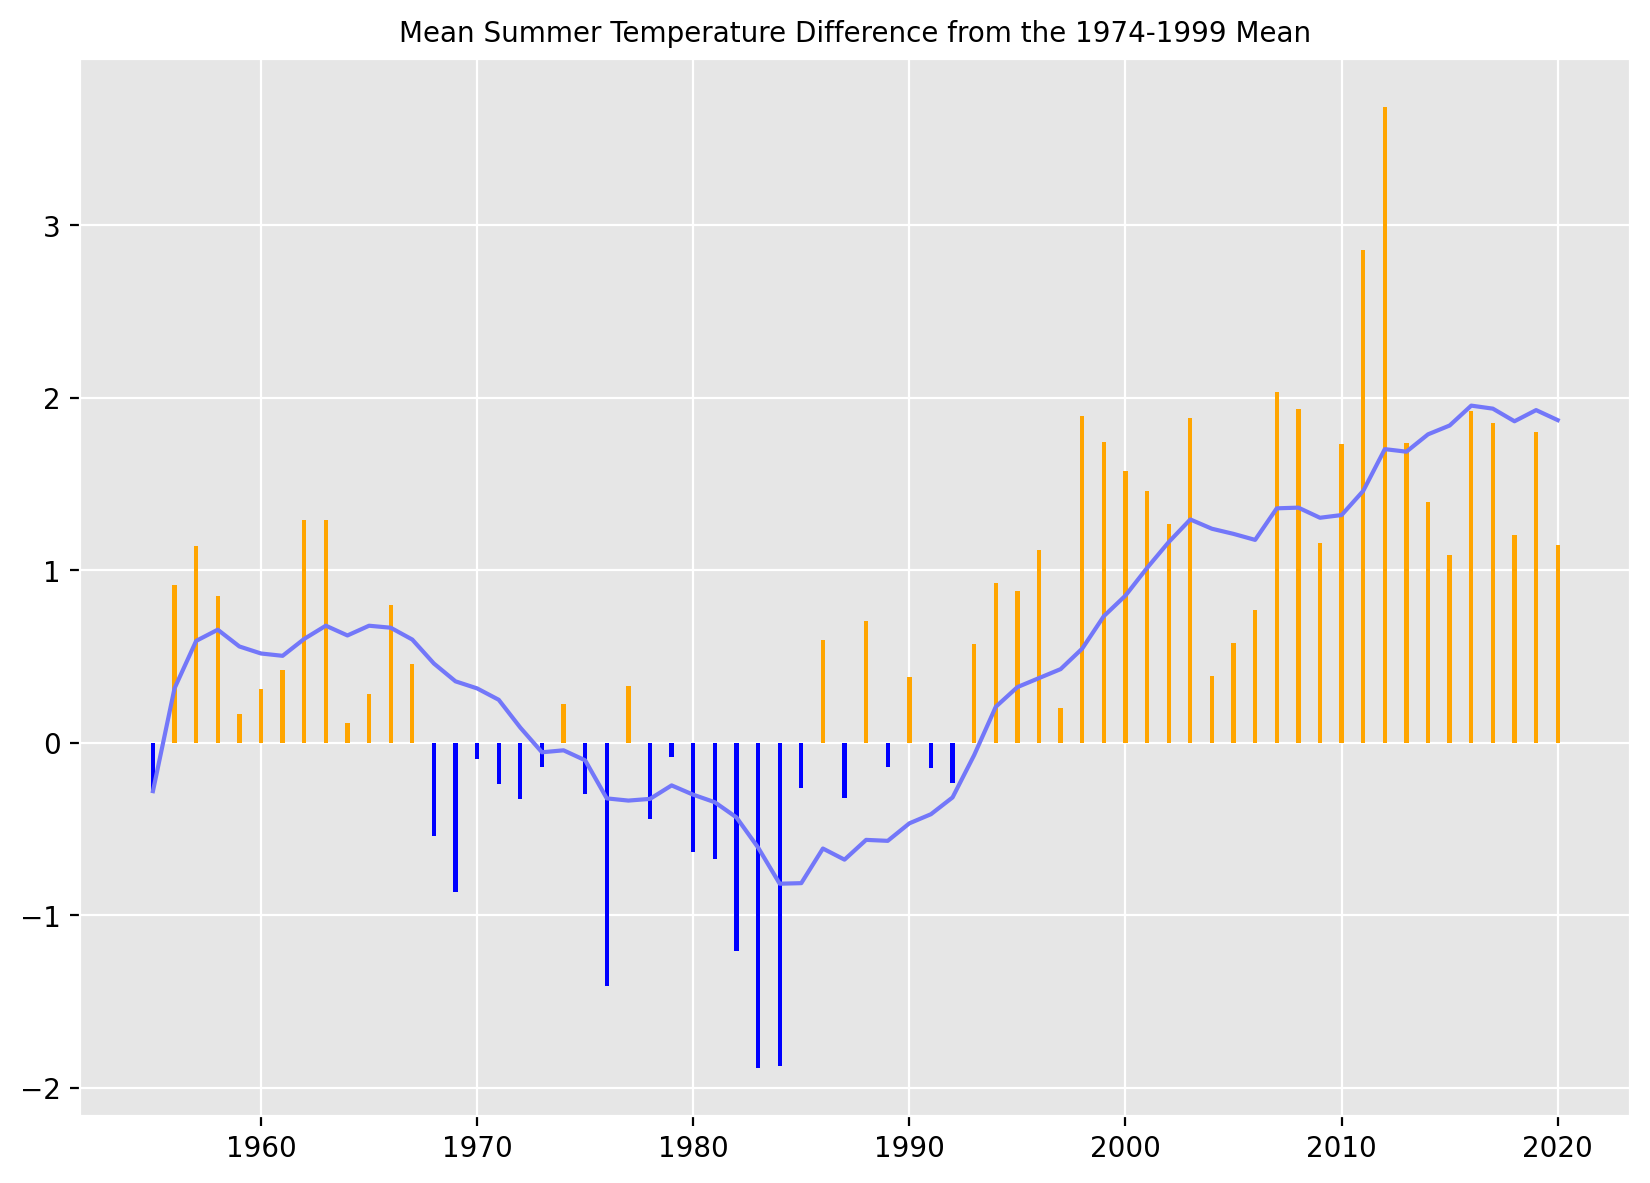

In [23]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=200)

# use a gray background
ax.set_facecolor('#E6E6E6')

# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Draw solid white grid lines
plt.grid(color='w', linestyle='solid')
ax.set_axisbelow(True)

# Color of bars
colormat=np.where(summer_of_the_year_deviation['DEVIATION']>0, 'orange','blue')

# Draw mean summer temperature deviation graph
ax.bar(summer_of_the_year_deviation['YEAR'],
       summer_of_the_year_deviation['DEVIATION'],
       color=colormat, width=0.2)

# Draw moving average of the deviation from the mean graph
sns.lineplot(x='YEAR', y='MA', data=summer_of_the_year_deviation, color='#7377F9', linewidth=1.5)

# Set title and axis labels
ax.set_title("Mean Summer Temperature Difference from the 1974-1999 Mean", 
             fontdict={'fontsize': 10, 'fontweight': 'medium'})
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

### Intepretation of the figure
According to "mean summer temperature deviation" graph we can see that the summers in Athens are divided into 3 main periods:
1. `1955`-`1967`
2. `1968`-`1992`
3. `1993`-`2020`

From `1955`-`1967` summer mean temperature was high. Then, the summer mean temperature remained relative low from `1968` to `1992` and from `1993` it started to rise again with `2012` the warmest summer on record. 

## Evolution of Daily Temperatures

We will create a plot showing the daily temperature for each year, one line chart for each year and the line corresponding to each year will be smoothed by using a 30 days rolling average. On that plot we will overlay a line showing the average daily temperature for the baseline period of 1974-1999.

### Preparation
To create the graphs we need to calculate :

For the daily temperature for each year graph:
1. The 30 days rolling average for each date of the dataset.

For average daily temperature for the baseline period graph:
1. Mean temperature of each Month-Day date from 1974 to 1999
2. The 30 days rolling average of average daily temperature for the baseline period.

#### 30 days rolling average for each date of the dataset
We will calculate rolling average with minimum number of observations 1 year's value (1 average temperature).

In [24]:
data_to_use['MA'] = data_to_use['TAVG'].rolling(window=30,min_periods=1).mean()

####  Mean temperature of each Month-Day date from 1974 to 1999
We will take all the data from 1974 to 1999 and then we will calculate the average temperature for each day of the year.

In [25]:
dates_1974_1999 = data_to_use.loc[(data_to_use['YEAR'] >= 1974) & 
                                  (data_to_use['YEAR'] <= 1999) , ['M-D','TAVG']]
avg_temp_1974_1999 = dates_1974_1999.groupby(by=[dates_1974_1999['M-D']]).mean()
avg_temp_1974_1999

,TAVG
M-D,
01-01,10.365385
01-02,10.707692
01-03,10.207692
01-04,9.634615
01-05,9.919231
...,...
12-27,9.769231
12-28,10.207692
12-29,10.776923


#### The 30 days rolling average of average daily temperature for the baseline period
We will calculate rolling average for mean temperatures with minimum number of observations 1 year's value (1 mean temperature).

In [26]:
avg_temp_1974_1999['MA'] = avg_temp_1974_1999['TAVG'].rolling(window=30,min_periods=1).mean()

### Creating the plot
We will draw a line charts showing the daily temperature for each year and a line chart showing the average daily temperature for the baseline period of 1974-1999.

The lines showing the daily temperature for each year are colored from light orange to dark orange, progressing through the years in ascending order and the black line showing the average daily temperature for the baseline.

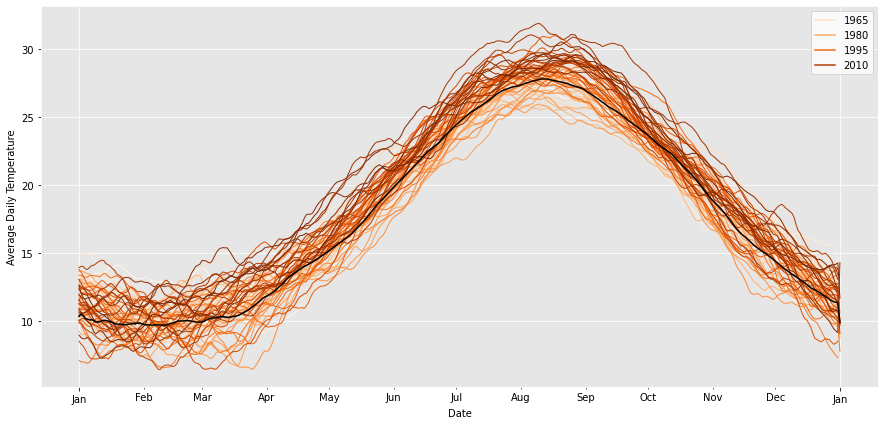

In [27]:
fig, ax = plt.subplots(figsize = (15, 7))

# Use a gray background
ax.set_facecolor('#E6E6E6')

# Draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# Hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# Draw a line chart for each year showing the daily temperature for each year.
sns.lineplot(x='M-D', y='MA', data=data_to_use, hue='YEAR', palette="Oranges", linewidth=1)

# Draw a line chart
sns.lineplot(x='M-D', y='MA', data=avg_temp_1974_1999, color='black', linewidth=1.5)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()

# Minor ticks every year.
fmt_year = mdates.YearLocator()
ax.xaxis.set_minor_locator(fmt_month)

# '%b' to get the names of the month
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Name axis labels
plt.xlabel("Date")
plt.ylabel("Average Daily Temperature")

leg = plt.legend()
plt.show()

### Intepretation of the figure
According to line plots:
1. From `January` to `March` the temperature in Athens are low with average temperature `10°C`
2. From `April` to `mid-August` the temperature is rising from `12°C` average temperature to `27°C`
3. From `mid-August` to `December` the temperature is falling from `27°C` average temperature to `12°C`

Athens seems to have `mild winters` (average temperature `10°C`) and `very warm summers` (average temperature up to `27°C`).
This diagram confirms that Greece has a Predominantly Mediterranean climate.

We can also see that temperatures have risen in recent years, because dark orange lines are higher than the light orange lines and above the black line with average daily temperatures of baseline.

## Extreme Temperature Events

We will create a plot with percentage of extreme heat events over the number of observations for each year. Extreme events are dates with expected value of heat for that day of the year beyond 10%.  On that plot we will overlay a line with the average percentage of extreme tempearture events of the baseline 1974-1999.

### Preparation

To create the graphs we need to calculate :

For percentage of extreme heat events over the number of observations for each year graphs:
1. Number of extreme heat events for each year
2. Number of observations for each year
3. Percentage of extreme temperature events for each year. 

For average percentage of extreme temperature events of the baseline graph:
1. Mean percentage of extreme temperature events for the baseline period 1974-1999.

#### Number of extreme heat events for each year 

We want to measure the number of extreme events. Extreme events are defined as those beyond 5% or 10% from the expected value. In our case, we will deal with extreme heat events going 10% above the baseline.

We found in previous step the expected values for every date of a year (`avg_temp_1974_1999`) and in order to use it with our dataset we will merge `data_to_use` and `avg_temp_1974_1999`. 

In [28]:
data_to_use_with_avg_t = data_to_use.merge(avg_temp_1974_1999, left_on='M-D', right_on='M-D')
data_to_use_with_avg_t

,DATE,PRCP,TAVG_x,TMAX,TMIN,YEAR,M-D,MA_x,TAVG_y,MA_y
0,1955-01-01,0.0,14.35,18.5,10.2,1955,01-01,14.350000,10.365385,10.365385
1,1956-01-01,0.0,16.35,18.5,14.2,1956,01-01,13.298333,10.365385,10.365385
2,1957-01-01,0.0,9.80,12.8,6.8,1957,01-01,10.795000,10.365385,10.365385
3,1958-01-01,0.0,12.10,17.6,7.6,1958,01-01,11.503333,10.365385,10.365385
4,1959-01-01,0.0,10.90,17.0,4.8,1959,01-01,12.963333,10.365385,10.365385
...,...,...,...,...,...,...,...,...,...,...
24099,2004-02-29,0.0,15.30,19.0,13.6,2004,02-29,9.753333,9.366667,9.925940
24100,2008-02-29,0.0,12.30,17.4,7.6,2008,02-29,9.093333,9.366667,9.925940
24101,2012-02-29,0.5,7.20,11.0,0.4,2012,02-29,9.806667,9.366667,9.925940
24102,2016-02-29,0.0,17.40,20.8,11.6,2016,02-29,14.323333,9.366667,9.925940


Now we have on each row of dataset the temperature of each date (`TAVG_x`) and the expected temperature of the baseline for the date (`TAVG_y`). 

We will find for each year the observation which are 10% above the expected temperature of the date of the year (`>1.1*the expected temperature`). Then, we will calculate the number of observation above baseline for each year.

In [29]:
count_ext_events = data_to_use_with_avg_t.loc[data_to_use_with_avg_t['TAVG_x'] > (1.1*data_to_use_with_avg_t['TAVG_y'])]
years_ext_events = count_ext_events.groupby(by=[count_ext_events['YEAR']])['TAVG_x'].count()
years_ext_events

YEAR
1955    128
1956    113
1957    117
1958    130
1959     96
       ... 
2016    159
2017    170
2018    173
2019    163
2020    168
Name: TAVG_x, Length: 66, dtype: int64

#### Number of observations for each year
We will calculate the number of observation for each year from `data_to_use` dataset.

In [30]:
observations_of_year = data_to_use.groupby(by=[data_to_use['YEAR']])['TAVG'].count()
observations_of_year

YEAR
1955    365
1956    366
1957    365
1958    365
1959    365
       ... 
2016    366
2017    365
2018    365
2019    365
2020    366
Name: TAVG, Length: 66, dtype: int64

We can see that some years observations are `366` not `365` and this is not because we have dublicate dates. Some years are called Leap Years. According to [nasa's website](https://spaceplace.nasa.gov/leap-year/en/), Earth needs approximately `365.25` days to orbit the Sun. In a calendar we round the days to `365` and we add one day to our calendar approximately every four years, to make up for the missing partial day. That is a leap year.

#### Percentage of extreme temperature events for each year.
We will calculate the ratio of Number of extreme heat events over the number of observations for each year.

In [31]:
p_of_extreme_h_events = years_ext_events / observations_of_year
p_of_extreme_h_events

YEAR
1955    0.350685
1956    0.308743
1957    0.320548
1958    0.356164
1959    0.263014
          ...   
2016    0.434426
2017    0.465753
2018    0.473973
2019    0.446575
2020    0.459016
Length: 66, dtype: float64

#### Mean percentage of extreme temperature events for the baseline period 1974-1999
We will calculate the average percentage of extreme temperature events from `1974` to `1999`

In [32]:
avr_p_of_baseline = p_of_extreme_h_events[(p_of_extreme_h_events.index >= 1974) & 
                                          (p_of_extreme_h_events.index <= 1999)].mean()
print('Mean percentage of extreme temperature events for the baseline: ', avr_p_of_baseline, "%", sep ="")

Mean percentage of extreme temperature events for the baseline: 0.24834654827917796%


### Create the plot
We will draw a bar chart for percentage of extreme heat events over the number of observations for each year graph and a line with the value of average percentage of extreme tempearture events of the baseline.
* The colour `blue` in bar chart is for those years where the percentage is below the average percentage of extreme tempearture events of the baseline and `orange` for for those years where the percentage is from average percentage of extreme tempearture events value of the baseline and above.

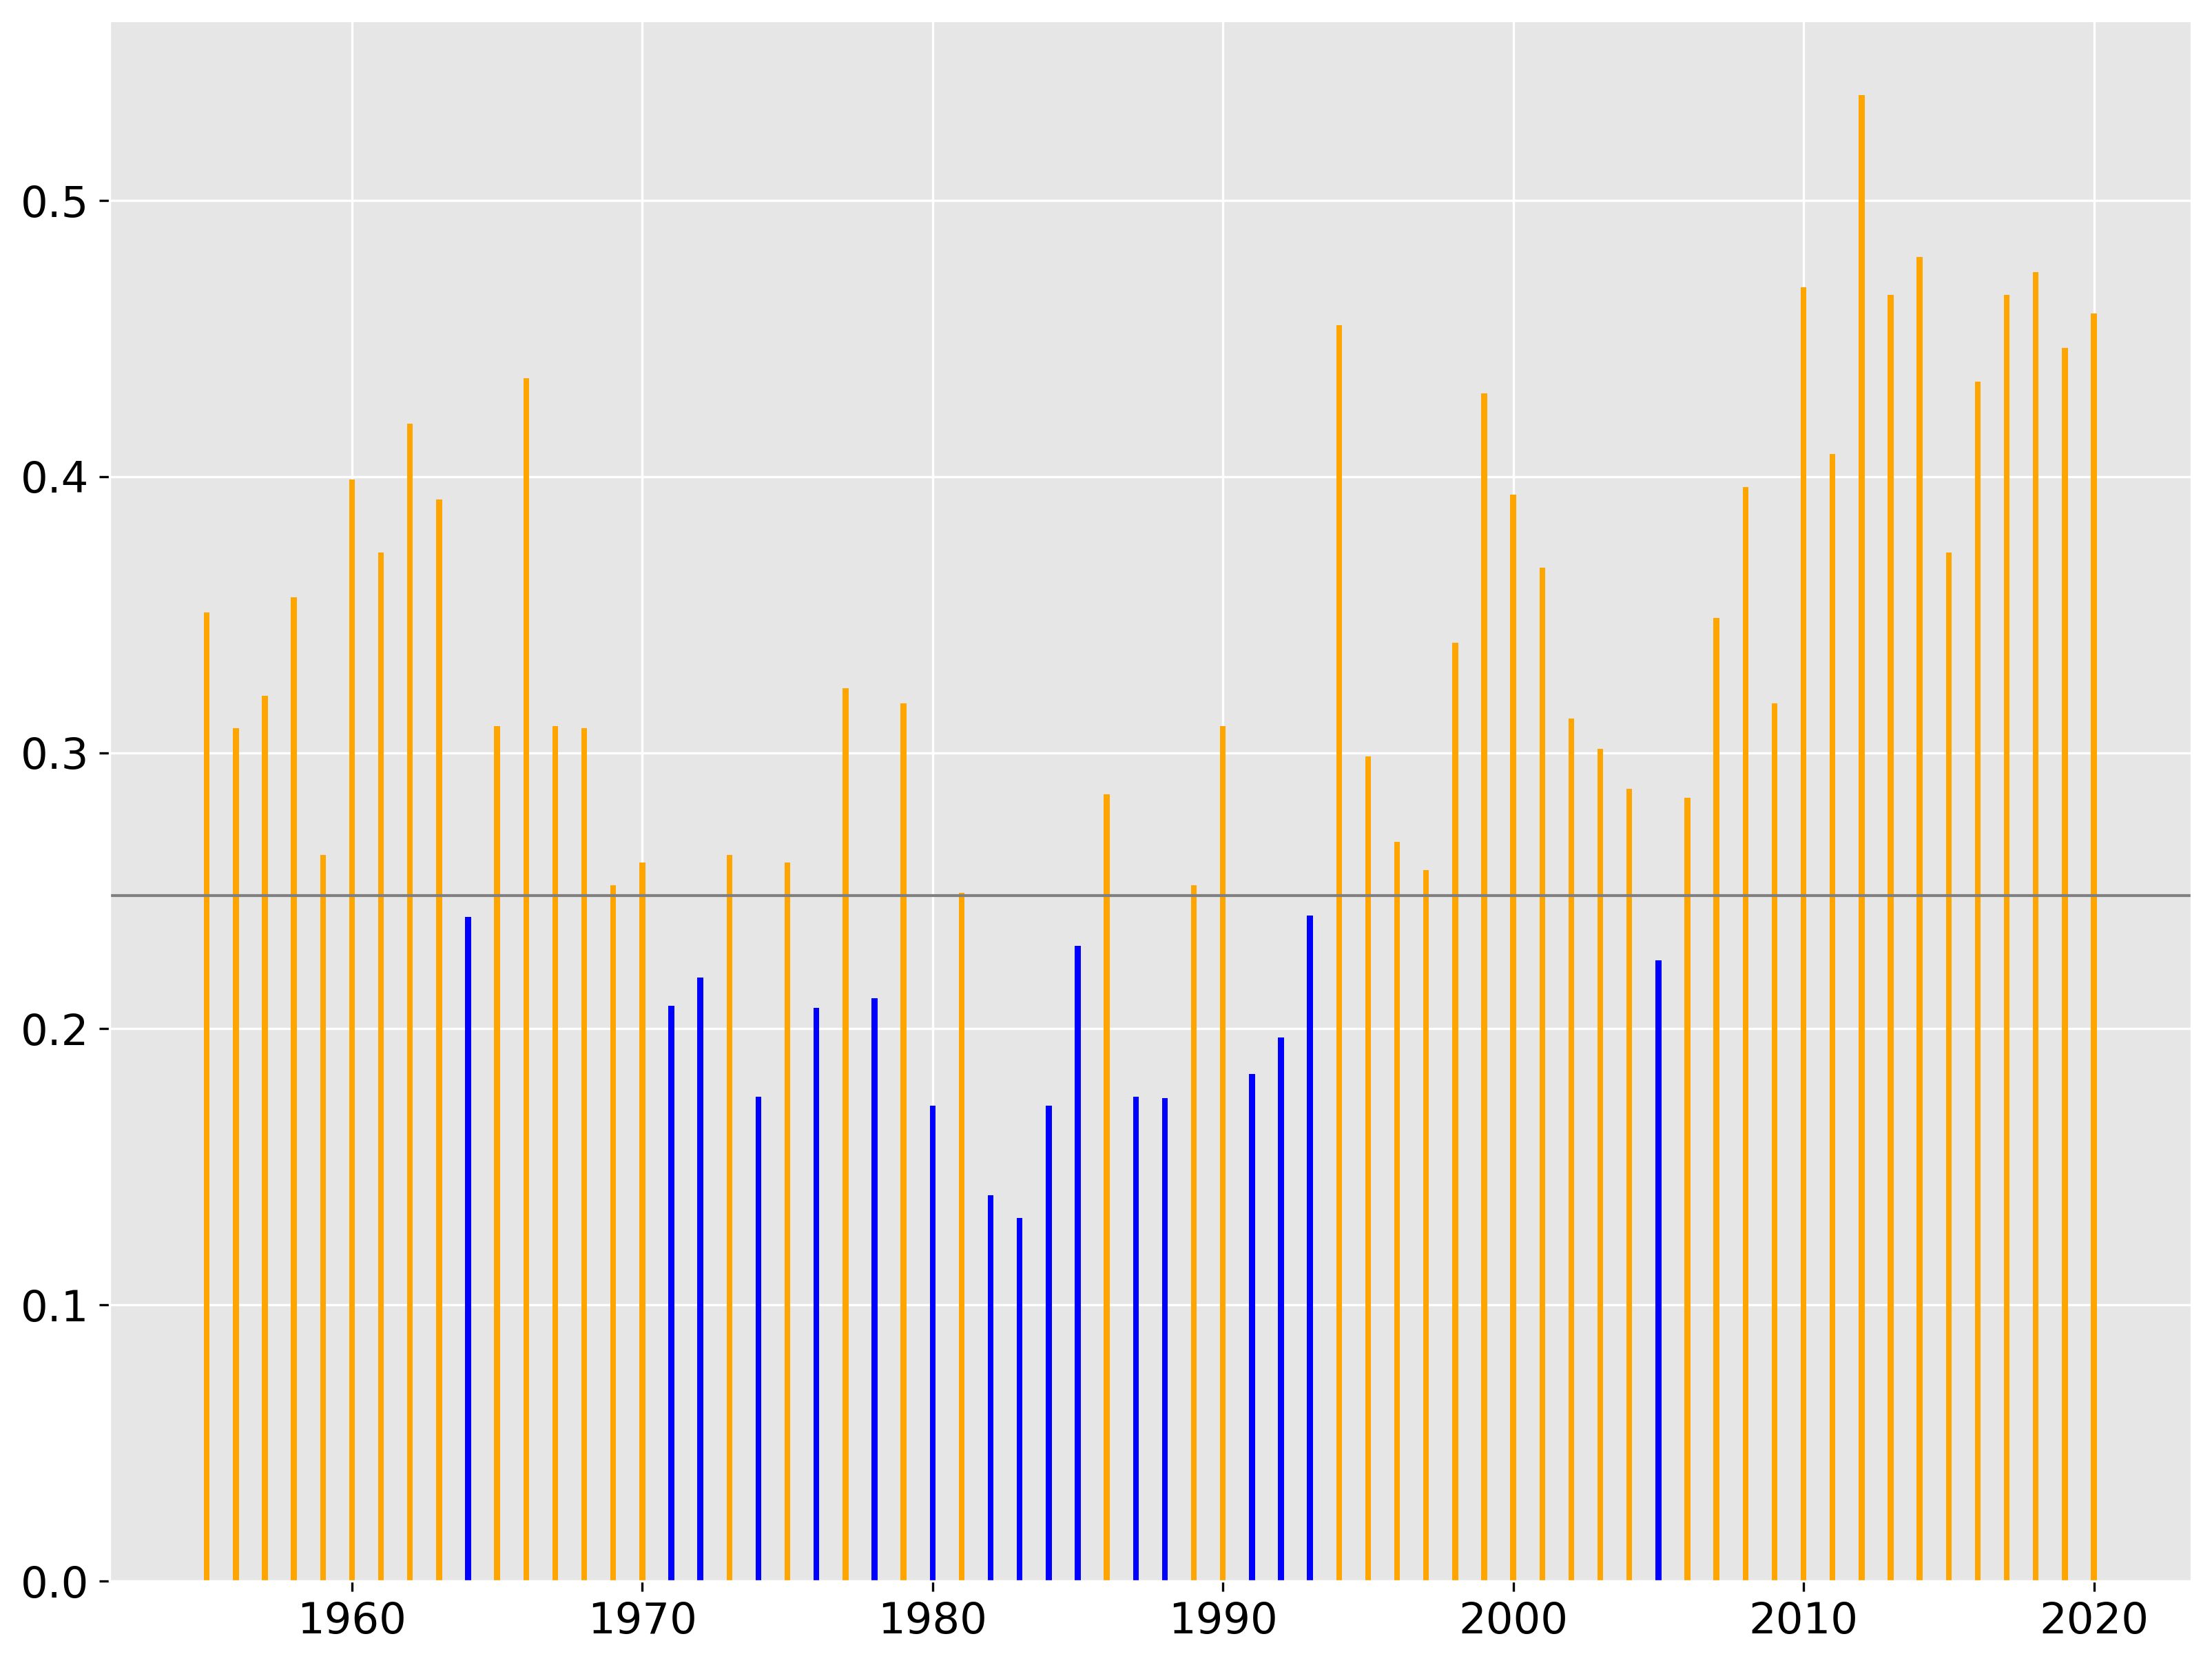

In [33]:
fig, ax = plt.subplots(figsize=(13, 10), dpi=300)

# Use a gray background
ax.set_facecolor('#E6E6E6')

# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Draw solid white grid lines
plt.grid(color='w', linestyle='solid')
ax.set_axisbelow(True)

# Color of bars
colormat=np.where(p_of_extreme_h_events.values >= avr_p_of_baseline, 'orange','blue')

# Draw percentage of extreme heat events over the number of observations for each year graph
ax.bar(p_of_extreme_h_events.index,
       p_of_extreme_h_events.values,
       color=colormat, width=0.2)

# Draw line with average percentage of extreme tempearture events of the baseline.
ax.axhline(linewidth=1, y=avr_p_of_baseline, color='grey')

# Set axis labels and ticks size
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.show()

### Intepretation of the figure

According to "percentage of extreme heat events over the number of observations for each year" ghaph we can see that the years in Athens are divided into 3 main periods:

1. `1955`-`1970`
2. `1971`-`1993`
3. `1994`-`2020`

From `1955`-`1970` percentage of extreme heat events was high. Then, the percentage of extreme heat events remained relative low from `1971` to `1993` and from `1994` it started to rise again with `2012` the year with the highest precentage of extreme events on record. We can see the result of the global warning in recent years of the chart and its continuous increase in the rate of extreme events.

## Precipitation

We will create a plot showing the ratio of rainfall over rainy days over the years. On the plot we will overlay the 10 years rolling average.

### Preparation
Preparation
To create the graphs we need to calculate :

For rainfall over rainy days over the years graph:
1. Division of the rainfall by the number of rainy days.

For moving average of the rainfall over rainy days over the years graph:
1. The 10 days rolling average of rainfall over rainy days ratio.

#### Division of the rainfall by the number of rainy days.
We will calculate the mean precipitation value of the rainy days. Rainy days are days with precipitation of 0.1 mm and above.

In [34]:
precipitation = data_to_use.loc[data_to_use['PRCP'] >= 0.1 ,['PRCP']].groupby(by=[data_to_use['YEAR']]).mean()
precipitation = precipitation.rename(columns={'PRCP': 'RF/RD'})
precipitation

,RF/RD
YEAR,
1955,8.044118
1956,5.409615
1957,4.153425
1958,5.147059
1959,3.451613
...,...
2016,6.410526
2017,6.457447
2018,7.288462


#### The 10 days rolling average of rainfall over rainy days ratio
We will calculate 10 days rolling average for rainfall over rainy days ratio with minimum number of observations 1 year's value.

In [35]:
precipitation['MA'] = precipitation['RF/RD'].rolling(window=10,min_periods=1).mean()

### Create the plot
We will draw a bar chart for rainfall over rainy days over the years graph and a line chart for moving average of the rainfall over rainy days over the years graph.

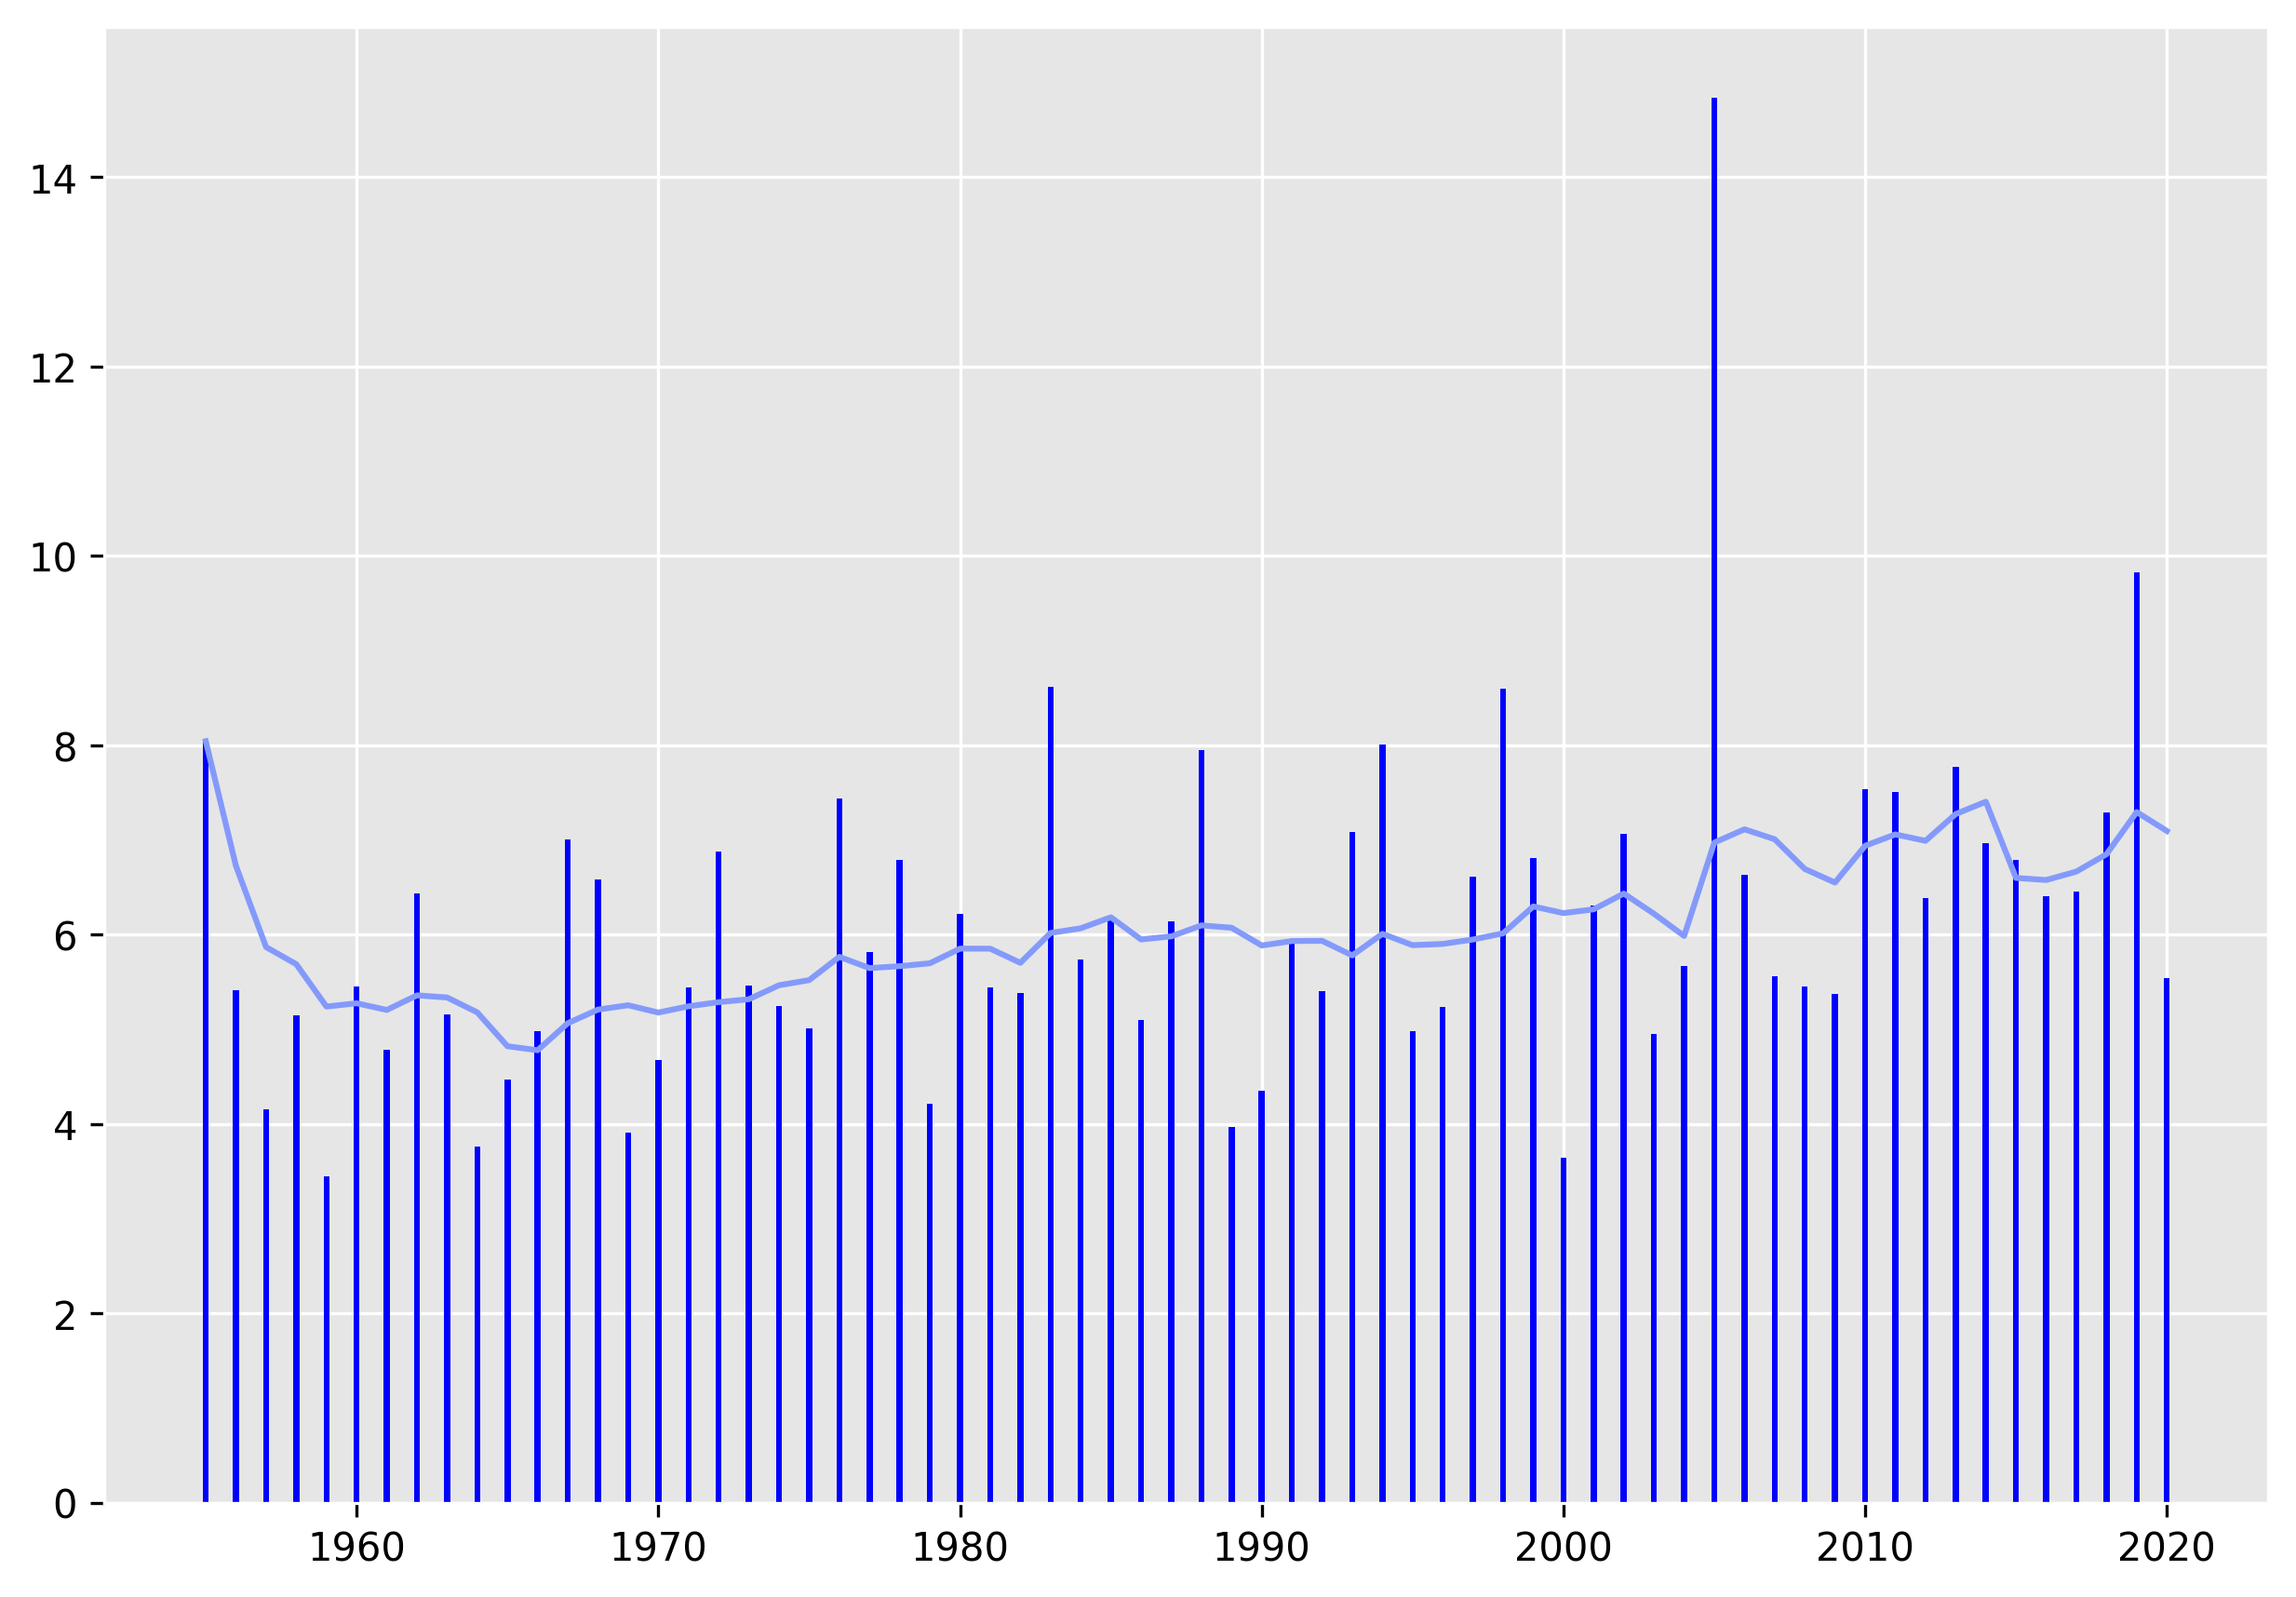

In [36]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)

# Use a gray background
ax.set_facecolor('#E6E6E6')

# Spine color of figure
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Draw solid white grid lines
plt.grid(color='w', linestyle='solid')
ax.set_axisbelow(True)

# Draw rainfall over rainy days over the years graph
ax.bar(precipitation.index, precipitation['RF/RD'], color='blue', width=0.2)

# Draw moving average of the rainfall over rainy days over the years graph
sns.lineplot(x='YEAR', y='MA', data=precipitation, color='#849AFB', linewidth=1.5)

# Set axis labels and ticks size
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(size = 10)
plt.yticks(size = 10)

plt.show()

### Intepretation of the figure
The proportion of rainfall over rainy days seem to be going up and down over the years but rolling average seem to increase and precipication becomes more intense over time. That happens because the ratio of rainfall over rainy days increases over years for wet (high ratio) as well as dry (low ratio) years with 2005 the highest ratio of rainfall over rainy days over the years. The concussion that the average rainfall rises over the years with ups and downs.